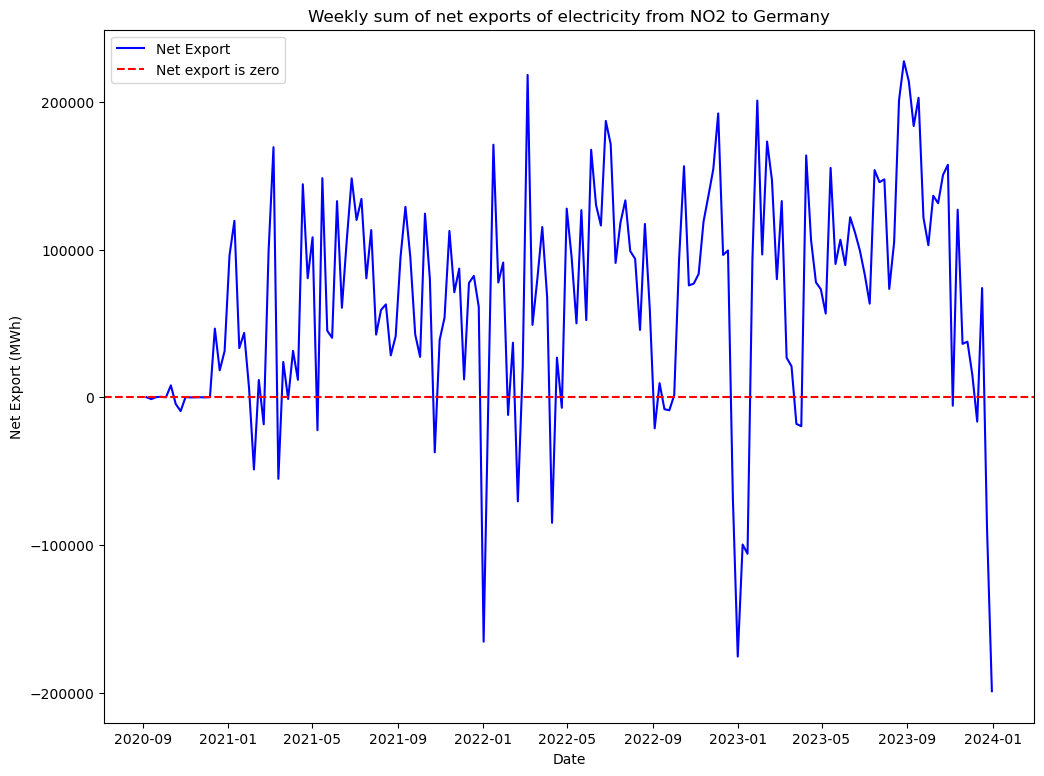

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Defining the data path and file pattern so there is no need to load each file individually 
DATA_PATH = './data/PhysicalFlows_12.1.G'
pattern = f'{DATA_PATH}/*_PhysicalFlows_12.1.G.csv'

# Loading and reading all matching files
data = []
for file in glob.glob(pattern):
    df = pd.read_csv(file, sep= '\t', parse_dates=['DateTime'])
    data.append(df)

# Concatenating all data into a single DataFrame
data = pd.concat(data, axis=0)

# Filter the data where flows are between NO2 and Germany (data1 = NO2 -> DE and data2 = DE -> NO2) and setting index to 'DateTime'
data1 = data[(data['OutMapCode'] == "NO2") & (data['InMapCode'] == "DE_LU")].set_index('DateTime')
data2 = data[(data['OutMapCode'] == "DE_LU") & (data['InMapCode'] == "NO2")].set_index('DateTime')

# Summing FlowValues for each hour to check whether there are duplicates
exports = data1['FlowValue'].resample('h').sum()
imports = data2['FlowValue'].resample('h').sum()

# Calculate net exports (exports - imports)
net_exports = exports - imports

# Summing up net exports for each week
weekly_net_exports = net_exports.resample('W').sum()

# Plotting
plt.figure(figsize=(12, 9))
plt.plot(weekly_net_exports.index, weekly_net_exports, label='Net Export ', color='blue')
#Adding a horizontal line to demonstrate net export is zero
plt.axhline(0, color='red', linestyle='--', label='Net export is zero')
plt.title('Weekly sum of net exports of electricity from NO2 to Germany')
plt.xlabel("Date")
plt.ylabel("Net Export (MWh)")
plt.legend()

# Saving the plot as figure_task4.png
plt.savefig("figure_task4.png")
plt.show()


CONCLUSION

Based on the graph, most of the time NO2 had exported electricity to Germany, but not always. Periods were there were significant dips in net exporting, indicating net importing from Germany were in January, especially in 2022, 2023 and 2024. This means that NO2 imports from Germany mostly during winter.